<a href="https://colab.research.google.com/github/GeovaniRA/Machine_Learning_Python/blob/main/CLASE1_PYTHON_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Data_Science/Machine_Learning_RHCECAM/datos/')
os.getcwd()

'/content/drive/MyDrive/Data_Science/Machine_Learning_RHCECAM/datos'

# Tipos de Algoritmos de ML

In [ ]:
from IPython.display import Image

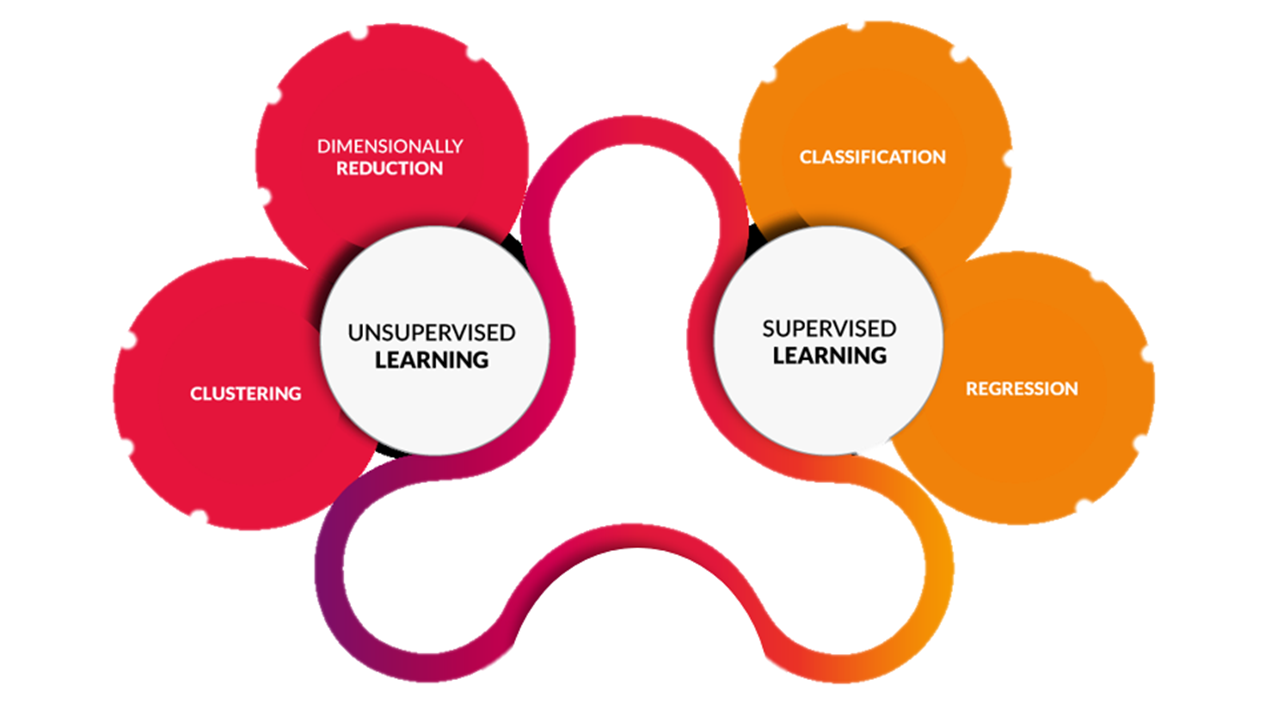

In [ ]:
Image('Tipos_de_Modelos.png')

[Algoritmos SKLEARN](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)


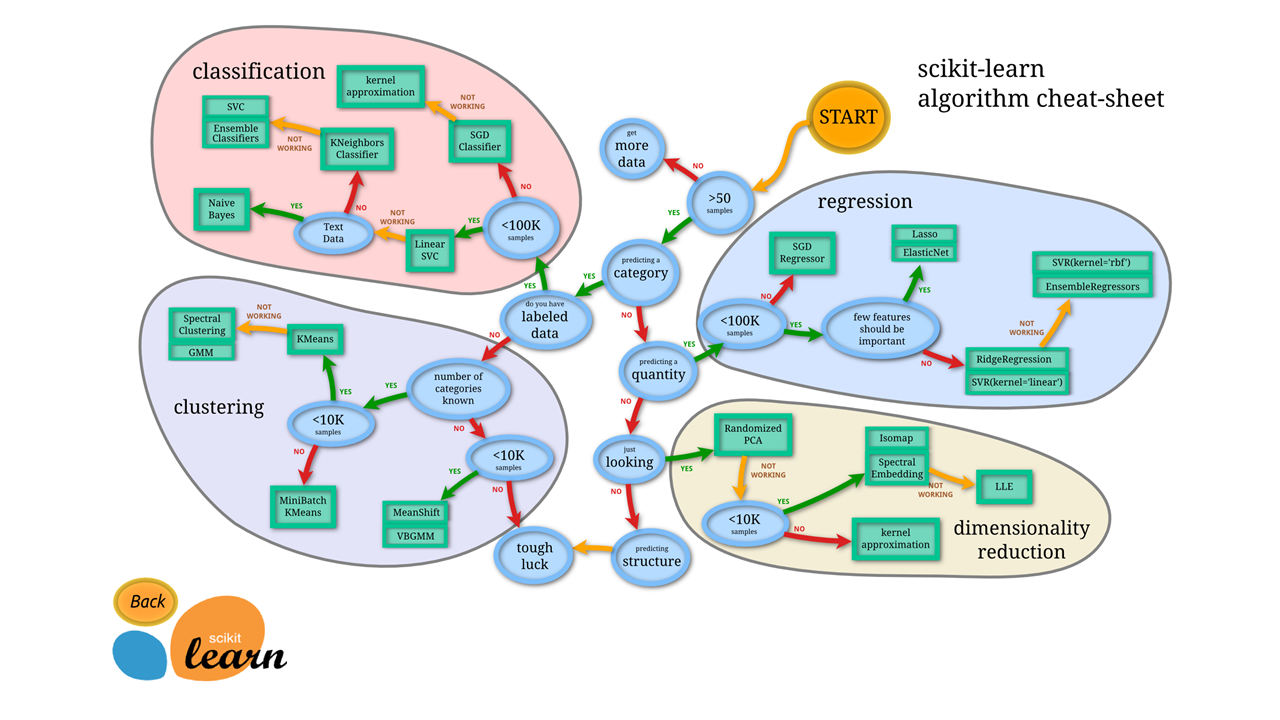

In [ ]:
Image('Modelos_ML.png')

# Análisis Bivariados

### Lectura de bases

Comando para leer archivos:
- *read_table*
- *read_csv*
- *read_excel*

**𝑑𝑖𝑟**: Directorio del archivo
**𝑠𝑒𝑝:** Separador de columnas
**ℎ𝑒𝑎𝑑𝑒𝑟:** 'True' si la base tiene nombre de columnas o 'none' si no los tiene
**𝑑𝑡𝑦𝑝𝑒:** Especifica el tipo de dato de todas las columnas o un subconjunto
**𝑛𝑎𝑚𝑒𝑠:** Nombre de las columnas
**𝑠ℎ𝑒𝑒𝑡_𝑛𝑎𝑚𝑒:** Nombre de la hoja (solo para archivos de excel)

In [ ]:
## Cargamos las librerías para trabajar bases de datos y generar gráficos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
## Base de Trabajo 1
seguros= pd.read_csv('insurance.csv', dtype = {'Hijos':str})
seguros[:5]

,Edad,Sexo,IMC,Hijos,Fumador,Region,Costo
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
seguros.columns  # Nombres de Columna de la base

Index(['Edad', 'Sexo', 'IMC', 'Hijos', 'Fumador', 'Region', 'Costo'], dtype='object')

In [ ]:
seguros.dtypes   # Tipo de dato de las columnas

Edad         int64
Sexo        object
IMC        float64
Hijos       object
Fumador     object
Region      object
Costo      float64
dtype: object

In [ ]:
seguros.Hijos.value_counts() # <= 10 datos todavia lo tomaria como categorica

0    574
1    324
2    240
3    157
4     25
5     18
Name: Hijos, dtype: int64

In [ ]:
## Base de Trabajo 2
auto= pd.read_csv('auto.csv', dtype = {'cilindros':str, 'origin':str, 'anio':str})
auto[:5]

,mpg,cilindros,desplazamiento,caballos,peso,aceleracion,anio,origin,nombre
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
print(auto.dtypes)

mpg               float64
cilindros          object
desplazamiento    float64
caballos           object
peso                int64
aceleracion       float64
anio               object
origin             object
nombre             object
dtype: object


### Resumen estadístico de las variables numéricas de un DataFrame

- *df.describe(percentiles, include)*

**percentiles:** Lista con percentiles que se desea ver para las variables numéricas
**Include:** ‘All’ para incluir las variables no numéricas, ‘category‘ para ver únicamente variables no numéricas

In [ ]:
# Visualizar el resumen estadístico de las variables numéricas de la base Seguros
seguros.describe()

,Edad,IMC,Costo
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


In [ ]:
seguros.describe(percentiles = [0.25,0.50,0.75,0.95], include = 'all')

,Edad,Sexo,IMC,Hijos,Fumador,Region,Costo
count,1338.000000,1338,1338.000000,1338,1338,1338,1338.000000
unique,NaN,2,NaN,6,2,4,NaN
top,NaN,male,NaN,0,no,southeast,NaN
freq,NaN,676,NaN,574,1064,364,NaN
mean,39.207025,NaN,30.663397,NaN,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,NaN,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,NaN,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,NaN,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,NaN,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,NaN,NaN,NaN,16639.912515


In [ ]:
## Visualizamos el resumen estadístico de Auto
auto.describe()

,mpg,desplazamiento,peso,aceleracion
count,398.000000,398.000000,398.000000,398.000000
mean,23.514573,193.425879,2970.424623,15.568090
std,7.815984,104.269838,846.841774,2.757689
min,9.000000,68.000000,1613.000000,8.000000
25%,17.500000,104.250000,2223.750000,13.825000
50%,23.000000,148.500000,2803.500000,15.500000
75%,29.000000,262.000000,3608.000000,17.175000
max,46.600000,455.000000,5140.000000,24.800000


## Valores Faltantes

- *pd.isnull(data)*

**data**: Dataframe o pandas.series

In [ ]:
## Veamos los NAs de la base
auto.isnull()

,mpg,cilindros,desplazamiento,caballos,peso,aceleracion,anio,origin,nombre
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False


In [ ]:
## Encontramos los nas por cada columna en la base
auto.isnull().sum()

mpg               0
cilindros         0
desplazamiento    0
caballos          0
peso              0
aceleracion       0
anio              0
origin            0
nombre            0
dtype: int64

## Acciones con Valores Faltantes

In [ ]:
# Cargar archivo para ejercicios de acciones con nulos
base_na= pd.read_csv("MuestraDropNa.csv", sep='|')
base_na

,C1,C2,C3
0,NaN,NaN,NaN
1,-0.470889,1.038324,1.037323
2,NaN,-1.768731,0.644946
3,0.592456,0.334538,NaN
4,NaN,NaN,-0.235055
5,0.901980,-0.135090,0.541934
6,NaN,0.804600,NaN
7,-0.219500,-0.291899,-0.795912
8,NaN,NaN,-1.455920
9,0.795262,-1.040248,NaN


***Eliminar Valores***

- *df.dropna(axis, how, subset)*

**axis:** 0 para filas, 1 para columnas
**how:** ‘any’, ‘all’ especifica condición para borrado
**susbet**: Subconjunto de columnas

In [ ]:
## Borramos todas las filas (axis=0) donde al menos un valor sea missing (how='any')
print(base_na)
base_na.dropna(axis = 0, how = 'any')

         C1        C2        C3
0       NaN       NaN       NaN
1 -0.470889  1.038324  1.037323
2       NaN -1.768731  0.644946
3  0.592456  0.334538       NaN
4       NaN       NaN -0.235055
5  0.901980 -0.135090  0.541934
6       NaN  0.804600       NaN
7 -0.219500 -0.291899 -0.795912
8       NaN       NaN -1.455920
9  0.795262 -1.040248       NaN


,C1,C2,C3
1,-0.470889,1.038324,1.037323
5,0.901980,-0.135090,0.541934
7,-0.219500,-0.291899,-0.795912


In [ ]:
## Borramos las columnas (axis=1) donde todos los valores sean missing (how='all')
print(base_na)
base_na.dropna(axis = 1, how = 'all')

         C1        C2        C3
0       NaN       NaN       NaN
1 -0.470889  1.038324  1.037323
2       NaN -1.768731  0.644946
3  0.592456  0.334538       NaN
4       NaN       NaN -0.235055
5  0.901980 -0.135090  0.541934
6       NaN  0.804600       NaN
7 -0.219500 -0.291899 -0.795912
8       NaN       NaN -1.455920
9  0.795262 -1.040248       NaN


,C1,C2,C3
0,NaN,NaN,NaN
1,-0.470889,1.038324,1.037323
2,NaN,-1.768731,0.644946
3,0.592456,0.334538,NaN
4,NaN,NaN,-0.235055
5,0.901980,-0.135090,0.541934
6,NaN,0.804600,NaN
7,-0.219500,-0.291899,-0.795912
8,NaN,NaN,-1.455920
9,0.795262,-1.040248,NaN


In [ ]:
## Borramos las filas (axis=0) donde todos los valores sean missing (how='all')
print(base_na)
base_na.dropna(axis = 0, how = 'all')

         C1        C2        C3
0       NaN       NaN       NaN
1 -0.470889  1.038324  1.037323
2       NaN -1.768731  0.644946
3  0.592456  0.334538       NaN
4       NaN       NaN -0.235055
5  0.901980 -0.135090  0.541934
6       NaN  0.804600       NaN
7 -0.219500 -0.291899 -0.795912
8       NaN       NaN -1.455920
9  0.795262 -1.040248       NaN


,C1,C2,C3
1,-0.470889,1.038324,1.037323
2,NaN,-1.768731,0.644946
3,0.592456,0.334538,NaN
4,NaN,NaN,-0.235055
5,0.901980,-0.135090,0.541934
6,NaN,0.804600,NaN
7,-0.219500,-0.291899,-0.795912
8,NaN,NaN,-1.455920
9,0.795262,-1.040248,NaN


### Imputación

- *df.fillna(valor)*

**valor:** Valor con el que se sustituyen los NA's puede ser texto ó numérico

In [ ]:
## Sustituimos los valores faltantes por '0'
print(base_na)
base_na.fillna(0)

         C1        C2        C3
0       NaN       NaN       NaN
1 -0.470889  1.038324  1.037323
2       NaN -1.768731  0.644946
3  0.592456  0.334538       NaN
4       NaN       NaN -0.235055
5  0.901980 -0.135090  0.541934
6       NaN  0.804600       NaN
7 -0.219500 -0.291899 -0.795912
8       NaN       NaN -1.455920
9  0.795262 -1.040248       NaN


,C1,C2,C3
0,0.000000,0.000000,0.000000
1,-0.470889,1.038324,1.037323
2,0.000000,-1.768731,0.644946
3,0.592456,0.334538,0.000000
4,0.000000,0.000000,-0.235055
5,0.901980,-0.135090,0.541934
6,0.000000,0.804600,0.000000
7,-0.219500,-0.291899,-0.795912
8,0.000000,0.000000,-1.455920
9,0.795262,-1.040248,0.000000


In [ ]:
## Imprimimos diferentes métricas estadísticas para cada columna
diccionario_metricas= {'C1': base_na.C1.mean(),
                       'C2': base_na.C2.median(),
                       'C3': 50}
print(base_na)
base_na.fillna(diccionario_metricas)

         C1        C2        C3
0       NaN       NaN       NaN
1 -0.470889  1.038324  1.037323
2       NaN -1.768731  0.644946
3  0.592456  0.334538       NaN
4       NaN       NaN -0.235055
5  0.901980 -0.135090  0.541934
6       NaN  0.804600       NaN
7 -0.219500 -0.291899 -0.795912
8       NaN       NaN -1.455920
9  0.795262 -1.040248       NaN


,C1,C2,C3
0,0.319862,-0.135090,50.000000
1,-0.470889,1.038324,1.037323
2,0.319862,-1.768731,0.644946
3,0.592456,0.334538,50.000000
4,0.319862,-0.135090,-0.235055
5,0.901980,-0.135090,0.541934
6,0.319862,0.804600,50.000000
7,-0.219500,-0.291899,-0.795912
8,0.319862,-0.135090,-1.455920
9,0.795262,-1.040248,50.000000


In [ ]:
## Validemos los NAs de la base de seguros
pd.isnull(seguros).sum()

Edad       0
Sexo       0
IMC        0
Hijos      0
Fumador    0
Region     0
Costo      0
dtype: int64

In [ ]:
## Validemos los NAs de la base de autos
auto.isna().sum()

mpg               0
cilindros         0
desplazamiento    0
caballos          0
peso              0
aceleracion       0
anio              0
origin            0
nombre            0
dtype: int64

Después de arreglar el problema de los datos faltantes comenzaremos con el análisis de las variablesy para esto las segmentaremos en 2 grupos:

* Variables Numéricas
* Variables Categóricas

Tipos de analisis de acuerdo a tipos de variables

* Variable objetivo (La que quiero predecir) Numerica:
  * Variable predictora numerica: Numerica - Numerica
  * Variable predictora categorica: Categorica - Numerica
* Variable objetivo (La que quiero predecir) Categorica:
  * Variable predictora numerica: Numerica - Categorica
  * Variable predictora categorica: Categorica - Categorica


In [ ]:
dict(seguros.dtypes)  # Diccionario donde las llaves son los nombres de columna
                      # y los valores son los tipos de columna

{'Edad': dtype('int64'),
 'Sexo': dtype('O'),
 'IMC': dtype('float64'),
 'Hijos': dtype('O'),
 'Fumador': dtype('O'),
 'Region': dtype('O'),
 'Costo': dtype('float64')}

In [ ]:
dict(auto.dtypes)

{'mpg': dtype('float64'),
 'cilindros': dtype('O'),
 'desplazamiento': dtype('float64'),
 'caballos': dtype('O'),
 'peso': dtype('int64'),
 'aceleracion': dtype('float64'),
 'anio': dtype('O'),
 'origin': dtype('O'),
 'nombre': dtype('O')}

In [ ]:
## Veamos las comprehension list de Python
lista= list(range(30))
lista[:10]

## Generamos una lista nueva con todos los números pares de la primer lista
[x for x in lista if x%2 == 0]

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]

In [ ]:
# Generemos una lista con todas las variables cetagóricas del dataframe haciendo uso de comprehension list
var_cat_seguros = [llave for llave in dict(seguros.dtypes) if dict(seguros.dtypes)[llave] == 'O']
var_cat_seguros

['Sexo', 'Hijos', 'Fumador', 'Region']

**Ejercicio**
* Generar una lista con las columnas de tipo numérico

In [ ]:
var_num_seguros = [llave for llave in dict(seguros.dtypes) if dict(seguros.dtypes)[llave] != 'O']
var_num_seguros

['Edad', 'IMC', 'Costo']

In [ ]:
# Base de autos
var_cat_auto = [llave for llave in dict(auto.dtypes) if dict(auto.dtypes)[llave] == 'O']
var_num_auto = [llave for llave in dict(auto.dtypes) if dict(auto.dtypes)[llave] != 'O']

print(var_cat_auto)
print(var_num_auto)

['cilindros', 'caballos', 'anio', 'origin', 'nombre']
['mpg', 'desplazamiento', 'peso', 'aceleracion']


### Gráfico de rendijas

- *sns.pairplot(df, height=3, diag_kind= 'hist', kind='scatter', markers='P')*

**df:** Dataframe con variables numéricas
**height:** Tamaño del gráfico
**diag_kind:** Tipo de gráfico en la diagonal {kde, hist}
**kind:** Tipo de gráfico fuera de la diagonal {scatter, reg}
**hue** Separador de variables categoricas
**markers:** Marcadores para los "gráficos de puntos"  [Marcadores de Matplotlib](https://matplotlib.org/api/markers_api.html)

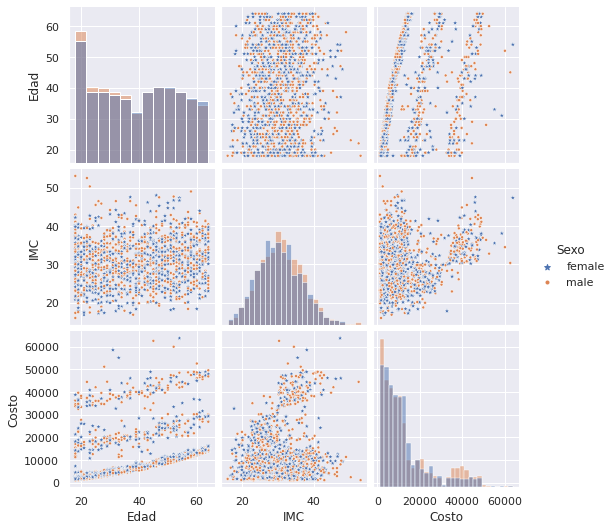

In [ ]:
#sns.pairplot(seguros[var_num_seguros], diag_kind = 'hist', kind = 'scatter', markers = 'P')
sns.pairplot(seguros, diag_kind = 'hist', kind = 'scatter', markers = ['*','.'], hue = 'Sexo')
plt.show()

<br>
## Bivariados Numéricas vs Numéricas

***Coeficiente de Correlación Pearson***

Es el índice que se usa para medir el grado de relación lineal entre dos variables numéricas continuas.
Este se mueve entre -1 y 1 donde:

- **Correlación negativa [-1, 0)**:  Cuando una variable crece la otra disminuye
- **Correlación nula 0**:  No hay relación entre las variables
- **Correlación Positiva (0, 1]**:  Cuando una variable aumenta la otra también

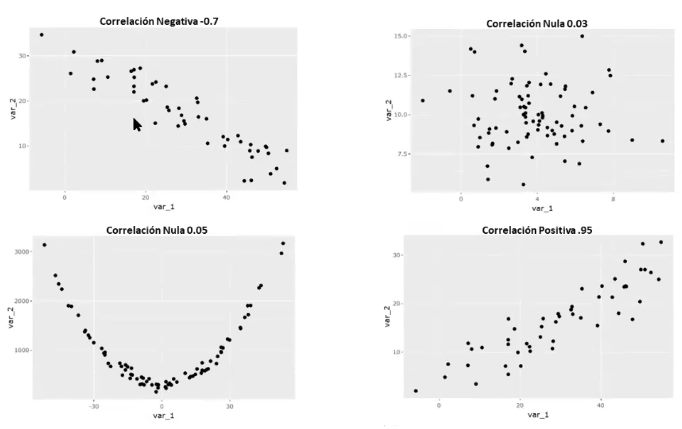

In [ ]:
Image('Correlacion.jpg')

In [ ]:
## Indice de correlación lineal
seguros[['Costo','Edad']].corr().style.background_gradient(cmap = 'inferno')

,Costo,Edad
Costo,1.000000,0.299008
Edad,0.299008,1.000000


### Gráfico de puntos

- *sns.scatterplot(x, y, hue, data)*

**x:** Variable numérica
**y:** Variable numérica
**hue:** Variable categórica para colorear de acuerdo a las clases
**data:** Dataframe de las variables

In [ ]:
sns.__version__

'0.11.2'

[]

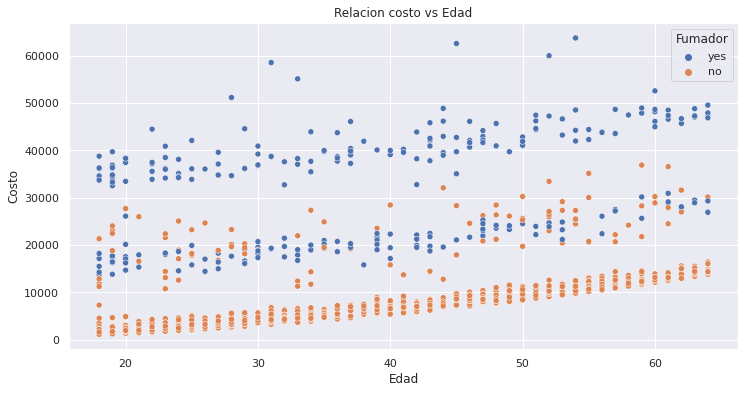

In [ ]:
## Gráfico de Costo vs Edad
plt.figure(figsize = (12,6))
sns.scatterplot(data = seguros, x = 'Edad', y = 'Costo', hue = 'Fumador')
plt.title('Relacion costo vs Edad')
plt.plot()

# Podemos ver una fuerte relacion lineal entre edad y costo, aunque se
# genera en tres niveles, por eso la correlacion es baja.
# La variable fumador logra separar a los clientes que pagan menos del, grupo
# intermedio y alto.

***Ejercicio***

Con la base auto:
* Generar listas con columnas numéricas y categóricas
* Encontrar variables numéricas que correlacionen con las mpg

In [ ]:
print(var_cat_auto)
print(var_num_auto)

['cilindros', 'caballos', 'anio', 'origin', 'nombre']
['mpg', 'desplazamiento', 'peso', 'aceleracion']


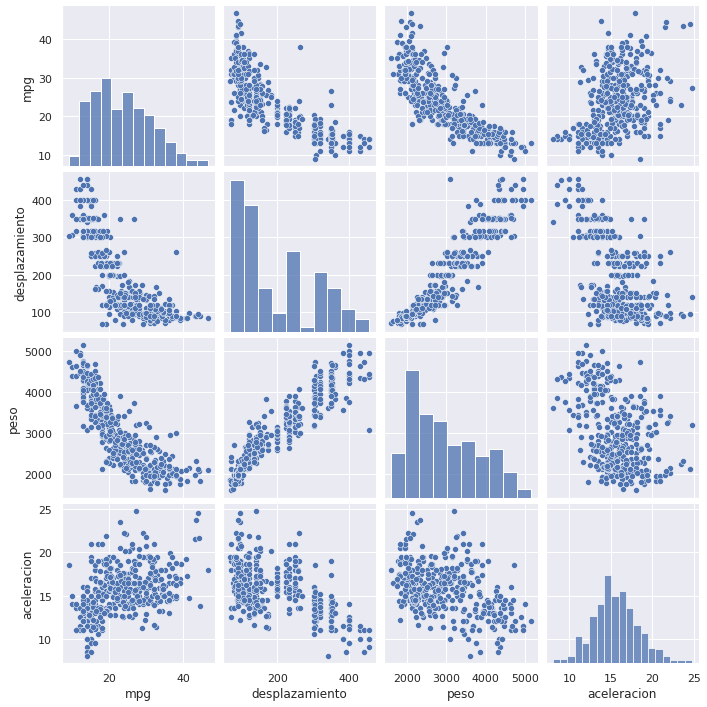

In [ ]:
sns.pairplot(auto)

In [ ]:
auto.corr().style.background_gradient(cmap = 'seismic')

,mpg,desplazamiento,peso,aceleracion
mpg,1.000000,-0.804203,-0.831741,0.420289
desplazamiento,-0.804203,1.000000,0.932824,-0.543684
peso,-0.831741,0.932824,1.000000,-0.417457
aceleracion,0.420289,-0.543684,-0.417457,1.000000


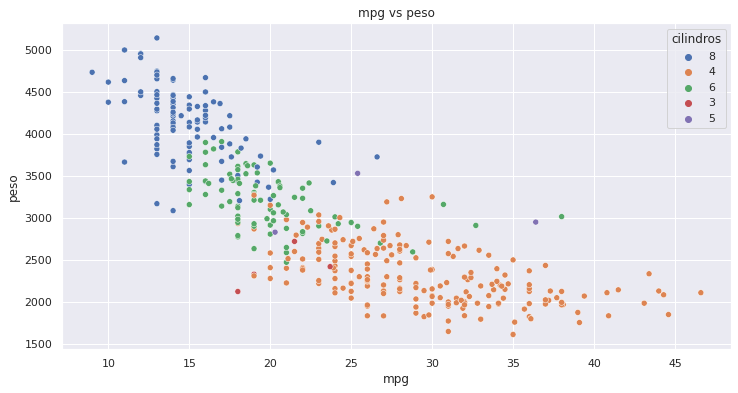

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(data = auto, x = 'mpg', y = 'peso', hue = 'cilindros')
plt.title('mpg vs peso')
plt.show()

<br>
## Bivariados Numéricas vs Categoricas

In [ ]:
# Veamos la lista de variables categóricas para generar este análisis
var_cat_seguros

['Sexo', 'Hijos', 'Fumador', 'Region']

In [ ]:
## Valores únicos de la variable Región
seguros.Region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: Region, dtype: int64

In [ ]:
## % Que representa cada región
print(seguros.Region.value_counts() / seguros.Region.value_counts().sum())
print('\n')
seguros.Region.value_counts(normalize = True)

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: Region, dtype: float64




southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: Region, dtype: float64

### Comparación de Distribuciones

In [ ]:
## Veamos si hay diferencia en los costos por región.

#Northeast: Noreste
#Northwest: Noroeste

In [ ]:
## Creamos un resumen estadístico del Costo para cada Región
seguros.groupby('Region')['Costo'].describe().round(2).T

Region,northeast,northwest,southeast,southwest
count,324.00,325.00,364.00,325.00
mean,13406.38,12417.58,14735.41,12346.94
std,11255.80,11072.28,13971.10,11557.18
min,1694.80,1621.34,1121.87,1241.56
25%,5194.32,4719.74,4440.89,4751.07
50%,10057.65,8965.80,9294.13,8798.59
75%,16687.36,14711.74,19526.29,13462.52
max,58571.07,60021.40,63770.43,52590.83


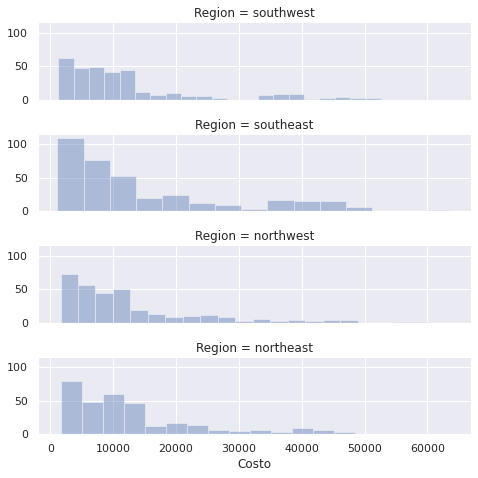

In [ ]:
# Gráfico para comparar la distribución de costos por cada región
g = sns.FacetGrid(seguros, row = 'Region', height = 1.7, aspect = 4)
g.map(sns.distplot, 'Costo', hist = True, kde = False)
plt.show()

### Cambiar Grupos de una Variable

- *df.replace({ 'variable' : { 'val1' : 'nuevo1', 'val2' : 'nuevo2', 'val3' : 'nuevo3'}}, inplace)*

**variable:** Variable categorica del data frame
**val:** Valor de la variable a reemplazar
**nuevo:** Valor nuevo
**Inplace:** True para reemplazar los valores en el df, False para generar uno nuevo

In [ ]:
## Agrupemos regiones este y oeste
seguros['Reg_Horiz'] = seguros.Region
seguros.replace({'Reg_Horiz':{'northeast':'este',
                              'southeast':'este',
                              'northwest':'oeste',
                              'southwest':'oeste'}
                 }, inplace = True)

In [ ]:
seguros.Reg_Horiz.value_counts()

este     688
oeste    650
Name: Reg_Horiz, dtype: int64

In [ ]:
## Creamos un resumen estadístico del Costo para cada Región agrupada
seguros.groupby('Reg_Horiz')['Costo'].describe().round(2).T

Reg_Horiz,este,oeste
count,688.00,650.00
mean,14109.53,12382.26
std,12772.74,11308.66
min,1121.87,1241.56
25%,4740.17,4740.29
50%,9735.84,8831.24
75%,18965.50,14249.72
max,63770.43,60021.40


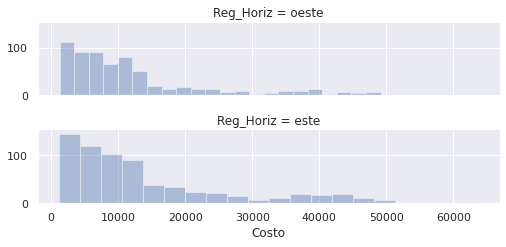

In [ ]:
# Gráfico para comparar la distribución de costos por cada Región agrupada
g = sns.FacetGrid(seguros, row = 'Reg_Horiz', height = 1.8, aspect = 4 )
g.map(sns.distplot, 'Costo', hist = True, kde = False)
plt.show()

### Gráfico Categórico

- *sns.catplot(x, y, data, data, kind, height, aspect)*

**x:** Variable categorica
**y:** Variable numérica
**data:** Dataframe de las variables
**kind:** Tipo de gráfico “point”, “bar”, “strip”, “swarm”, “box”, “violin”, or “boxen”
**height:** Tamaño del gráfico
**aspect:** Relación de gráficos

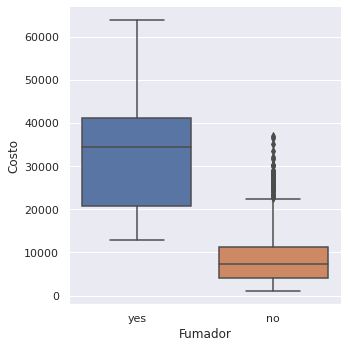

In [ ]:
## Ahora analisemos la variable fumador en lugar de región con este gráficos
sns.catplot(x = 'Fumador', y = 'Costo', data = seguros, kind = 'box')

# Si estan separadas sera util para predicir

### Prueba ANOVA

***Análisis de varianza***

$SS_{total}=SS_{fact}+SS_{error}$

$\sum _{i}\sum _{j}(y_{ij}-{\overline {y}})^{2}= n\sum _{i}(\overline y_{i} - {\overline {y}})^{2}+\sum _{i}\sum _{j}(y_{ij}-y_{i})^{2}$

$x_j   \forall j \in 1,..,n $
$i:$ *i ésima categoría de la variable*

El anova mide el porcentaje de varianza explicado por la variable categórica, construye un estadistico con distibución F el cual se contrasta en una prueba de hipótesis donde H0: Las medias de los grupos son iguales - lo que indicaría que no hay diferencia entre los grupos. Buscamos rechazar H0 por lo que buscaremos un pi-value bajo.

In [ ]:
## Librerías para prueba anova
from statsmodels import api as ap
from statsmodels.formula.api import ols

In [ ]:
## Prueba anova para Región (Queremos pi-value pequeño para rechazar H0)

model_reg_seguros = ols('Costo ~ Region', data = seguros) # Generamos una regresion lineal
ajuste_seguros = model_reg_seguros.fit()                  # Ajustamos el modelo
anova = ap.stats.anova_lm(ajuste_seguros)                 # Calculamos el test anova
anova.round(2)                                            # Imprimir anova

# Se rechaza que las medias son iguales, por lo que la variable ayuda a predecir
# el costo.

,df,sum_sq,mean_sq,F,PR(>F)
Region,3.0,1.300760e+09,4.335866e+08,2.97,0.03
Residual,1334.0,1.947735e+11,1.460071e+08,NaN,NaN


In [ ]:
## Prueba anova para Fumador
modelo_reg_seguros_2 = ols('Costo ~ Fumador', data = seguros)
ajuste_2 = modelo_reg_seguros_2.fit()
anova_2 = ap.stats.anova_lm(ajuste_2)
anova_2.round(2)

# Se rechaza que las medias sean iguales, por lo que la variable fumador ayuda a
# predecir el costo

,df,sum_sq,mean_sq,F,PR(>F)
Fumador,1.0,1.215199e+11,1.215199e+11,2177.61,0.0
Residual,1336.0,7.455432e+10,5.580413e+07,NaN,NaN


**Ejercicio**

* Con la auto, analiza 2 variables categóricas que relacionan con las mpg

In [ ]:
print(var_cat_auto)

['cilindros', 'caballos', 'anio', 'origin', 'nombre']


In [ ]:
print(auto.groupby('cilindros')['mpg'].describe().round(2).T)

print(''' \nAl revisar la variable podemos ver que los autos de 3 y 5 cilindros no tienen
suficientes elementos para generar estadisticas por lo que decidimos sacarlos\n''')

auto_filter = auto[auto.cilindros.isin(['4','6','8'])]
auto_filter.groupby('cilindros')['mpg'].describe().round(2).T

cilindros      3       4      5      6       8
count       4.00  204.00   3.00  84.00  103.00
mean       20.55   29.29  27.37  19.99   14.96
std         2.56    5.71   8.23   3.81    2.84
min        18.00   18.00  20.30  15.00    9.00
25%        18.75   25.00  22.85  18.00   13.00
50%        20.25   28.25  25.40  19.00   14.00
75%        22.05   33.00  30.90  21.00   16.00
max        23.70   46.60  36.40  38.00   26.60
 
Al revisar la variable podemos ver que los autos de 3 y 5 cilindros no tienen  
suficientes elementos para generar estadisticas por lo que decidimos sacarlos



cilindros,4,6,8
count,204.00,84.00,103.00
mean,29.29,19.99,14.96
std,5.71,3.81,2.84
min,18.00,15.00,9.00
25%,25.00,18.00,13.00
50%,28.25,19.00,14.00
75%,33.00,21.00,16.00
max,46.60,38.00,26.60


In [ ]:
# Analizar la variable de cilindros
reg_auto = ols('mpg ~ cilindros', data = auto_filter)
ajuste_auto = reg_auto.fit()
anova_auto = ap.stats.anova_lm(ajuste_auto)
anova_auto.round(2)

# Se rechaza que las medias sean iguales, por lo que la variable cilindros
# ayuda a predecir las mpg

,df,sum_sq,mean_sq,F,PR(>F)
cilindros,2.0,15375.09,7687.55,345.12,0.0
Residual,388.0,8642.68,22.27,NaN,NaN


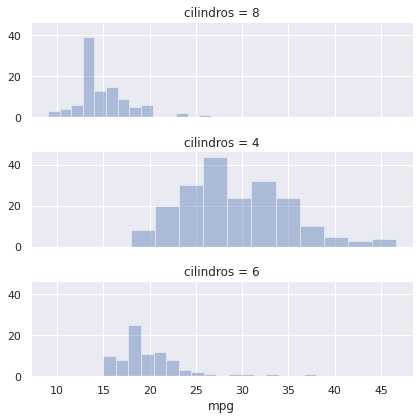

In [ ]:
g = sns.FacetGrid(data = auto_filter, row = 'cilindros', height =  2, aspect = 3)
g.map(sns.distplot, 'mpg', hist = True, kde = False)
plt.show()

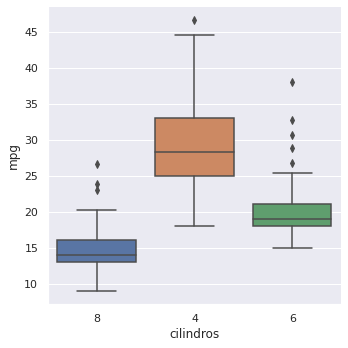

In [ ]:
sns.catplot(data = auto_filter, x = 'cilindros', y = 'mpg', kind = 'box')

In [ ]:
# Analisis de los caballos
reg_auto_2 = ols('mpg ~ origin', data = auto_filter)
ajuste_auto_2 = reg_auto_2.fit()
anova_auto_2 = ap.stats.anova_lm(ajuste_auto_2)
anova_auto_2.round(2)

# Se rechaza que las medias sean iguales por lo que la variable origin
# ayuda a predecir los mpg

,df,sum_sq,mean_sq,F,PR(>F)
origin,2.0,8407.01,4203.51,104.48,0.0
Residual,388.0,15610.75,40.23,NaN,NaN


In [ ]:
auto_filter.groupby('origin')['mpg'].describe().round(2).T

origin,1,2,3
count,249.00,67.00,75.00
mean,20.08,27.91,30.98
std,6.40,6.72,5.77
min,9.00,16.20,19.00
25%,15.00,24.00,27.00
50%,18.50,27.00,32.00
75%,24.00,30.60,34.10
max,39.00,44.30,46.60


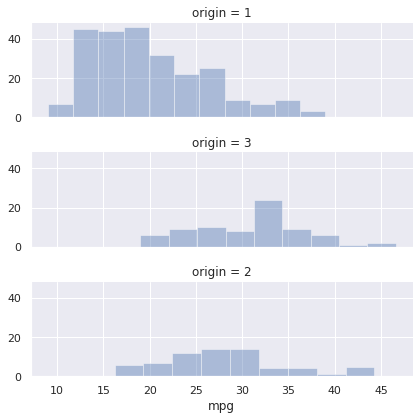

In [ ]:

g = sns.FacetGrid(data = auto_filter, row = 'origin', height = 2, aspect = 3)
g.map(sns.distplot, 'mpg', hist = True, kde = False)
plt.show()

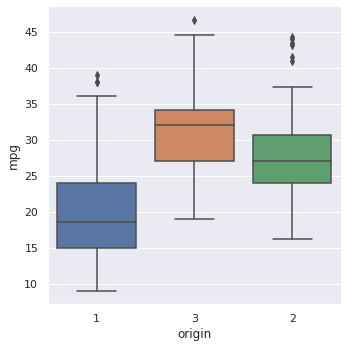

In [ ]:
sns.catplot(data = auto_filter, x = 'origin', y = 'mpg', kind = 'box')

<br>
## Bivariados Categórica vs Categórica

In [ ]:
cardio= pd.read_csv('CARDIO.csv', sep =',', dtype = {'Slope':str})
cardio[:5]

,Edad,Sexo,Tipo_Dolor,Presion_Art,Colesterol,Azucar,Electro,RitmoCard,AnginaEjer,oldpeak,Slope,ca,thal,Padecimiento
0,63,H,Angina_Atipica,145,233,>120,Lenta,150,NO,2.3,3,0,Defecto_Fijo,Sin_Pad
1,67,H,Sin_Dolor,160,286,<120,Lenta,108,SI,1.5,2,3,Normal,Con_Pad
2,67,H,Sin_Dolor,120,229,<120,Lenta,129,SI,2.6,2,2,Defecto_Reversible,Con_Pad
3,37,H,Dolor_No_Angina,130,250,<120,Normal,187,NO,3.5,3,0,Normal,Sin_Pad
4,41,M,Angina_Tipica,130,204,<120,Lenta,172,NO,1.4,1,0,Normal,Sin_Pad


In [ ]:
## Lista de columnas string
var_cat = [x for x in dict(cardio.dtypes) if dict(cardio.dtypes)[x] == 'O']
var_num = [x for x in dict(cardio.dtypes) if dict(cardio.dtypes)[x] != 'O']

## Lista de columnas numéricas y cat
print(var_cat)
print(var_num)

['Sexo', 'Tipo_Dolor', 'Azucar', 'Electro', 'AnginaEjer', 'Slope', 'ca', 'thal', 'Padecimiento']
['Edad', 'Presion_Art', 'Colesterol', 'RitmoCard', 'oldpeak']


### Prueba Ji Cuadrada

Nos ayuda a saber si dos variables categóricas tienen relación a partir de la tabla de contingencia que se genera con estas.
Esta prueba se realiza suponiendo que las variables son independientes, se calcular la distribución de las observaciones en la tabla de contingencia y se comparan los valores esperados vs los valores observados y apartir de esta comparación se obtiene el  estadístico:

$ \displaystyle \chi ^{2}=\sum _{i}{\frac {(\mathrm {observada} _{i}-\mathrm {teorica} _{i})^{2}}{\mathrm {teorica} _{i}}}$

H0: Variables independientes

Buscamos rechazar H0 por lo que queremos un pi-value bajo

In [ ]:
import scipy.stats as est  # Librería para test ji-cuadrada

## Encontrar si hay relación entre Padecimientos y Sexo
# 1. Generar Tabla de contingencia

t = pd.crosstab(cardio.Padecimiento, cardio.Sexo)
t.style.background_gradient(cmap = 'inferno')

Sexo,H,M
Padecimiento,,
Con_Pad,114,25
Sin_Pad,92,72


In [ ]:
# 2. Test Ji-cuadrada
# test_chi = est.chi2_contingency(t, correction = True) - clase con menos del 5% datos / ya no es tan fiable
test_chi = est.chi2_contingency(t)
print('Estadistico Ji_Cuadrado: ',test_chi[0],'\n') # Estadistico Ji_Cuadrado
print('P-value: ',test_chi[1].round(3),'\n') # P-value , quiero que sea menor al 5%
print('Grados de libertad: ', test_chi[2],'\n') # Grados de libertad
pd.DataFrame(test_chi[3], columns = ['H','M'],
             index = ['Con_Pad', 'Sin_Pad']).style.background_gradient() # Tabla de valores esperados

# P-value < 5%, por lo tanto 'Sexo' nos ayudaria a predecir el padecimiento.

Estadistico Ji_Cuadrado:  22.042560606155476 

P-value:  0.0 

Grados de libertad:  1 



,H,M
Con_Pad,94.501650,44.498350
Sin_Pad,111.498350,52.501650


In [ ]:
# Tamaño de muestra en la Ji-Cuadrada
test_chi_peq = est.chi2_contingency(t/10)
print('P-value: ',test_chi_peq[1].round(3),'\n')
(t/10).style.background_gradient()

P-value:  0.257 



Sexo,H,M
Padecimiento,,
Con_Pad,11.400000,2.500000
Sin_Pad,9.200000,7.200000


In [ ]:
test_chi_gran = est.chi2_contingency(t*100)
print('P-value: ',test_chi_gran[1].round(3),'\n')
(t*100).style.background_gradient()

# La prueba Ji_cuadrada se ve afectada fuertemente por el tamaño de muestra
# a mayor cantidad de muestra es mas facil que acepte (RH0)

P-value:  0.0 



Sexo,H,M
Padecimiento,,
Con_Pad,11400,2500
Sin_Pad,9200,7200


### Gráfico de Mosaico

In [ ]:
# Gráfico de Mosaico
from statsmodels.graphics.mosaicplot import mosaic